<a href="https://colab.research.google.com/github/weimarquintero/UDEA-ai4eng-20242/blob/main/99%20-%20modelo%20soluci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando las librerias necesarias.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Cargando el archivo resultante del proceso de preprocesado.

In [ ]:
#carga del archivo train.csv con pandas
df_train = pd.read_csv('/content/drive/MyDrive/dataFrame_final.csv')
del(df_train["Unnamed: 0"])
df_train.head()
#df_train.shape

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,RENDIMIENTO_GLOBAL
0,6.25,0.5,3,1,2
1,3.25,0.0,3,0,0
2,3.25,3.5,3,1,0
3,4.75,0.0,4,1,3
4,3.25,2.5,3,1,1


Trabajando sobre la columna de rendimiento.

In [ ]:
y_col = 'RENDIMIENTO_GLOBAL'
df_train = df_train[sorted(df_train.columns)]

X = df_train[[c for c in df_train.columns if c!=y_col]].values
y = df_train[y_col].values
X.shape, y.shape

((692500, 4), (692500,))

Creando el split de entrenamiento y el de test mediante el archivo de train.

In [ ]:
from sklearn.model_selection import train_test_split
Xtr, Xts, ytr, yts = train_test_split(X,y, train_size=0.8)
Xtr.shape, Xts.shape, ytr.shape, yts.shape

((554000, 4), (138500, 4), (554000,), (138500,))

Creando y entrenando el random forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_depth=100)
rf.fit(Xtr, ytr)

RandomForestClassifier(max_depth=100, n_estimators=10)

In [ ]:
preds_tr = rf.predict(Xtr)
preds_ts = rf.predict(Xts)

In [ ]:
print (preds_tr[:10])
print (preds_ts[:10])

[1 0 0 1 1 1 1 3 1 0]
[1 2 0 1 3 3 3 1 0 0]


In [ ]:
np.mean(preds_tr==ytr), np.mean(preds_ts==yts)

(0.3815469314079422, 0.37885920577617327)

In [ ]:
!pip install rlxutils

  Preparing metadata (setup.py) ... done
  Created wheel for rlxutils: filename=rlxutils-0.1.10-py3-none-any.whl size=11100 sha256=a1324913387a3ff2a7c80aa99b27521e7987b6df03c117955b77478cfa7587f6
  Stored in directory: /root/.cache/pip/wheels/9a/45/da/49bdb0e82cc7a605e9c05dc24265687c5f349b53dcb74728e2
Successfully built rlxutils


In [ ]:
from sklearn.metrics import confusion_matrix
cm_tr = confusion_matrix(ytr, preds_tr)
cm_ts = confusion_matrix(yts, preds_ts)

# normalize by class
cm_tr = cm_tr / cm_tr.sum(axis=1).reshape(-1,1)
cm_ts = cm_ts / cm_ts.sum(axis=1).reshape(-1,1)

Analizando la matriz de confusion.

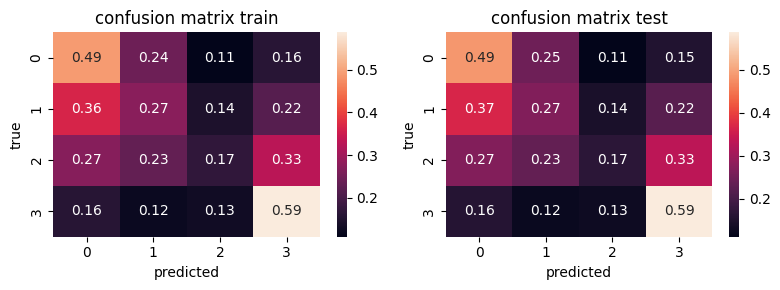

In [ ]:
from rlxutils import subplots
import matplotlib.pyplot as plt
import seaborn as sns
for ax,i in subplots(2, usizex=4):
  if i==0: sns.heatmap(cm_tr, annot=True); plt.title("confusion matrix train")
  if i==1: sns.heatmap(cm_ts, annot=True); plt.title("confusion matrix test")
  plt.ylabel("true")
  plt.xlabel("predicted")

Se toma la decision de trabajar con este modelo, puesto que su prediccion mejoró un poco con respecto a los modelos anteriores y por tanto cargamos el archivo de test y trabajaremos sobre este.

Descargamos los archivos desde Kaggle.

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

 60% 12.0M/20.1M [00:00<00:00, 122MB/s]
100% 20.1M/20.1M [00:00<00:00, 147MB/s]


In [ ]:
!unzip udea*.zip > /dev/null

validamos la carga de los archivos.

In [ ]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


Cargamos el archivo de test.csv

In [ ]:
zt = pd.read_csv("test.csv")
zt

,Unnamed: 0,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO
0,0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Primaria completa,Si
1,1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,No
2,2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,No
3,3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Primaria incompleta,No
4,4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No
...,...,...,...,...,...,...,...,...,...,...,...,...
296781,296781,496981,20195,ADMINISTRACION DE EMPRESAS,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 1,Si,Primaria incompleta,Primaria incompleta,Si
296782,296782,209415,20183,DERECHO,META,Entre 1 millón y menos de 2.5 millones,0,Estrato 4,Si,Educación profesional completa,Educación profesional completa,No
296783,296783,239074,20212,DERECHO,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Educación profesional completa,No
296784,296784,963852,20195,INGENIERIA AERONAUTICA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Entre 11 y 20 horas,Estrato 3,Si,Educación profesional completa,Educación profesional completa,No


Tomamos las columnas que definimos a trabajar con el modelo.

In [ ]:
zt_ids = zt['ID'].values
zt = zt[['ESTU_VALORMATRICULAUNIVERSIDAD','ESTU_HORASSEMANATRABAJA','FAMI_ESTRATOVIVIENDA','FAMI_TIENEINTERNET']]
print ("shape of loaded dataframe", zt.shape)
zt.head()

shape of loaded dataframe (296786, 4)


,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET
0,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si
1,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si
2,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si
3,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No
4,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si


Trabajamos sobre los valores faltantes de estas columnas.

In [ ]:
sum(zt.ESTU_VALORMATRICULAUNIVERSIDAD.isna()), sum(zt.ESTU_HORASSEMANATRABAJA.isna()), sum(zt.FAMI_ESTRATOVIVIENDA.isna()) , sum(zt.FAMI_TIENEINTERNET.isna())

(0, 0, 0, 0)

LLenamos los valores faltantes.

In [ ]:
zt.ESTU_VALORMATRICULAUNIVERSIDAD.values[zt.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info'
zt.ESTU_HORASSEMANATRABAJA.values[zt.ESTU_HORASSEMANATRABAJA.isna()] = 'no info'
zt.FAMI_ESTRATOVIVIENDA.values[zt.FAMI_ESTRATOVIVIENDA.isna()] = 'no info'
zt.FAMI_TIENEINTERNET.values[zt.FAMI_TIENEINTERNET.isna()] = 'no info'

Procesamos las columnas para que tengan valores con los cuales puede trabajar el modelo.

In [ ]:
cmap = {'Entre 1 millón y menos de 2.5 millones': 1.75,
 'Entre 2.5 millones y menos de 4 millones': 3.25,
 'Menos de 500 mil': .250,
 'Entre 500 mil y menos de 1 millón': .75,
 'Entre 4 millones y menos de 5.5 millones': 4.75,
 'Más de 7 millones': 7.75,
 'Entre 5.5 millones y menos de 7 millones': 6.25,
 'No pagó matrícula': 0,
 'no info': -1}

zt.ESTU_VALORMATRICULAUNIVERSIDAD = np.r_[[cmap[i] for i in zt.ESTU_VALORMATRICULAUNIVERSIDAD]]
zt.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()

<ipython-input-37-a20ef3f1a062>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zt.ESTU_VALORMATRICULAUNIVERSIDAD = np.r_[[cmap[i] for i in zt.ESTU_VALORMATRICULAUNIVERSIDAD]]


,count
ESTU_VALORMATRICULAUNIVERSIDAD,
1.75,86923
3.25,55193
0.25,34589
0.75,33564
4.75,29855
7.75,29061
6.25,16558
0.00,8320
-1.00,2723


In [ ]:
cmap = {'Entre 11 y 20 horas': 1.5,
 'Entre 21 y 30 horas': 2.5,
 'Menos de 10 horas': .5,
 'Más de 30 horas': 3.5,
 '0': 0,
 'no info': -1}

zt.ESTU_HORASSEMANATRABAJA = np.r_[[cmap[i] for i in zt.ESTU_HORASSEMANATRABAJA]]
zt.ESTU_HORASSEMANATRABAJA.value_counts()

<ipython-input-39-96a3b492c703>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zt.ESTU_HORASSEMANATRABAJA = np.r_[[cmap[i] for i in zt.ESTU_HORASSEMANATRABAJA]]


,count
ESTU_HORASSEMANATRABAJA,
3.5,106189
0.0,50422
1.5,49386
2.5,39931
0.5,37479
-1.0,13379


In [ ]:
cmap = {'Estrato 1': 1,
  'Estrato 2': 2,
  'Estrato 3': 3,
  'Estrato 4': 4,
  'Estrato 5': 5,
  'Estrato 6': 6,
  'Sin Estrato': -1,
  'no info': -1}

zt.FAMI_ESTRATOVIVIENDA = np.r_[[cmap[i] for i in zt.FAMI_ESTRATOVIVIENDA]]
zt.FAMI_ESTRATOVIVIENDA.value_counts()

<ipython-input-40-a3306870f7f1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zt.FAMI_ESTRATOVIVIENDA = np.r_[[cmap[i] for i in zt.FAMI_ESTRATOVIVIENDA]]


,count
FAMI_ESTRATOVIVIENDA,
2,99288
3,90719
1,48092
4,27823
-1,15219
5,10194
6,5451


In [ ]:
cmap = {'Si': 1,
 'No': 0,
 'no info': -1}

zt.FAMI_TIENEINTERNET = np.r_[[cmap[i] for i in zt.FAMI_TIENEINTERNET]]
zt.FAMI_TIENEINTERNET.value_counts()

<ipython-input-41-f23ab46abc6e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zt.FAMI_TIENEINTERNET = np.r_[[cmap[i] for i in zt.FAMI_TIENEINTERNET]]


,count
FAMI_TIENEINTERNET,
1,254075
0,31172
-1,11539


In [ ]:
zt.head()
zt.shape

(296786, 4)

In [ ]:
X_test_data = zt[sorted(zt.columns)].values
X_test_data.shape

(296786, 4)

Ponemos a prueba nuestro modelo.

In [ ]:
preds_test_data = rf.predict(X_test_data)

Hacemos el mapping inverso para ir creando nuestra sumision en Kaggle.

In [ ]:
# inverse mapping
rmap = {'alto': 3, 'bajo':0, 'medio-bajo':1, 'medio-alto':2}
rmapi = {v:k for k,v in rmap.items()}
text_preds_test_data = [rmapi[i] for i in preds_test_data]

Creamos nuestra sumision.

In [ ]:
submission = pd.DataFrame([zt_ids, text_preds_test_data], index=['ID', 'RENDIMIENTO_GLOBAL']).T
submission

,ID,RENDIMIENTO_GLOBAL
0,550236,alto
1,98545,medio-bajo
2,499179,alto
3,782980,bajo
4,785185,bajo
...,...,...
296781,496981,medio-bajo
296782,209415,alto
296783,239074,medio-alto
296784,963852,alto


Guardamos nuestra sumision.

In [ ]:
# save to file ready to submit
submission.to_csv("my_submission.csv", index=False)

In [ ]:
!head my_submission.csv

ID,RENDIMIENTO_GLOBAL
550236,alto
98545,medio-bajo
499179,alto
782980,bajo
785185,bajo
58495,bajo
705444,alto
557548,alto
519909,bajo


Enviamos nuestra sumision a Kaggle.

In [ ]:
!kaggle competitions submit -c udea-ai4eng-20242 -f my_submission.csv -m "Weimar Quintero submission with random forests"

100% 3.97M/3.97M [00:00<00:00, 5.31MB/s]
Successfully submitted to UDEA/ai4eng 20242 - Pruebas Saber Pro Colombia